In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("model/")
from diffusion import GaussianDiffusion, DiffusionImageAPI
import torch
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt


In [3]:
from PIL import Image
import requests

url = "https://www.themoviedb.org/t/p/w1280/6oom5QYQ2yQTMJIbnvbkBL9cHo6.jpg"
image = Image.open(requests.get(url, stream=True).raw)
w, h = image.size
image = image.resize((w // 16, h // 16))
#image = image.resize((16, 16))
w, h = image.size
print(f"[{w}x{h}]")
image
image.save("./test.jpg")


[80x120]


In [4]:
diffusion = GaussianDiffusion(
  model=None,
  noise_steps=256,
  beta_0=1e-4,
  beta_T=0.02,
  image_size=(w, h),
  schedule="cosine"
)
diffusion2 = GaussianDiffusion(
  model=None,
  noise_steps=256,
  beta_0=1e-4,
  beta_T=0.02,
  image_size=(w, h),
  schedule="linear"
)


In [5]:
test = np.array(image)
print(test.shape)


(120, 80, 3)


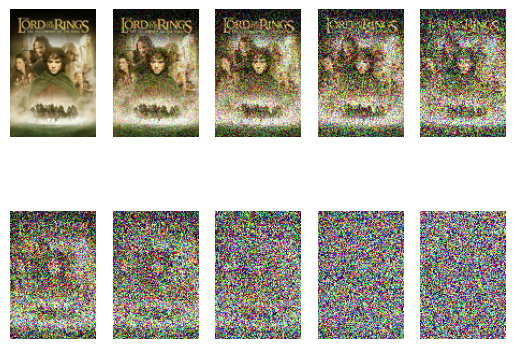

In [23]:
imageAPI = DiffusionImageAPI(diffusion)
timesteps = np.linspace(0, 255, 10).astype(int)
#print(timesteps)

images = imageAPI.get_noisy_images(image, time_steps=timesteps)
for i in range(len(images)):
  plt.subplot(2, 5, i + 1)
  plt.imshow(images[i])
  plt.axis("off")


In [34]:
len(torch.Size([2, 1, 120, 80, 3]))


5

In [21]:
image = image_copy
image = torch.from_numpy(np.array(image))
image = diffusion.normalize_image(image)
t = diffusion.sample_time_steps(1)
print(t)
image = diffusion.apply_noise(image, t)
imageAPI.tensor_to_image(diffusion.denormalize_image(image.squeeze(0)))


tensor([251])
Value of t tensor([251])


AttributeError: 'tuple' object has no attribute 'squeeze'